<ipython-input-3-ffdc0dd1a295>:12: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/DarkNet.csv')  # Αντικαταστήστε με το μονοπάτι του αρχείου σας αν είναι διαφορετικό


Αναφορά Ταξινόμησης (Classification Report):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9243
           1       0.95      0.97      0.96      6762
           2       0.97      0.90      0.93       420
           3       0.94      0.93      0.93      4135

    accuracy                           0.97     20560
   macro avg       0.97      0.95      0.96     20560
weighted avg       0.97      0.97      0.97     20560



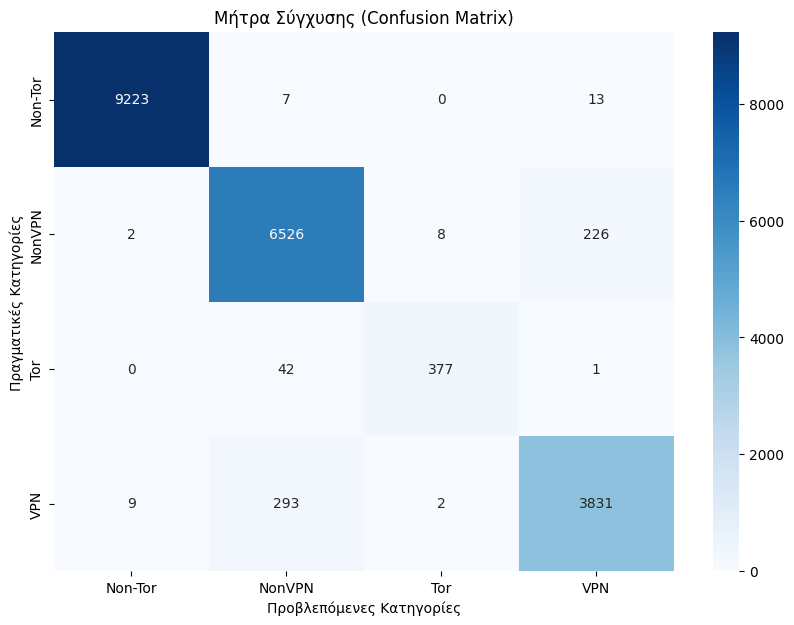

In [3]:
# Εισαγωγή απαραίτητων βιβλιοθηκών
import pandas as pd  # Διαχείριση και ανάλυση δεδομένων
import numpy as np   # Υποστήριξη αριθμητικών υπολογισμών
from sklearn.model_selection import train_test_split  # Διαχωρισμός δεδομένων σε εκπαίδευση και δοκιμή
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Κωδικοποίηση κατηγορικών μεταβλητών και κανονικοποίηση
from sklearn.ensemble import RandomForestClassifier  # Αλγόριθμος Random Forest για ταξινόμηση
from sklearn.metrics import classification_report, confusion_matrix  # Μετρικές αξιολόγησης του μοντέλου
import matplotlib.pyplot as plt  # Οπτικοποίηση δεδομένων
import seaborn as sns  # Βελτιωμένες γραφικές παραστάσεις

# Φόρτωση δεδομένων από το αρχείο CSV
data = pd.read_csv('/content/DarkNet.csv')  # Αντικαταστήστε με το μονοπάτι του αρχείου σας αν είναι διαφορετικό

# Προεπεξεργασία Δεδομένων
data['Flow_Bytes/s'] = pd.to_numeric(data['Flow_Bytes/s'], errors='coerce')  # Μετατροπή σε αριθμούς, αντικαθιστώντας μη αριθμητικές τιμές με NaN
data_cleaned = data.replace([np.inf, -np.inf], np.nan).dropna()  # Αφαίρεση απειριστικών και μη αριθμητικών τιμών

# Κωδικοποίηση της ετικέτας (Label-1)
label_encoder = LabelEncoder()  # Αρχικοποίηση του LabelEncoder
data_cleaned['Label-1'] = label_encoder.fit_transform(data_cleaned['Label-1'])  # Κωδικοποίηση κατηγορικών τιμών σε αριθμούς

# Επιλογή χαρακτηριστικών (X) και στόχου (y)
X = data_cleaned.drop(columns=['Src_IP', 'Dst_IP', 'Label-1', 'Label-2'])  # Αφαίρεση μη απαραίτητων στηλών
y = data_cleaned['Label-1']  # Ορισμός της ετικέτας ως στόχος

# Κανονικοποίηση χαρακτηριστικών
scaler = StandardScaler()  # Αρχικοποίηση κανονικοποιητή
X_scaled = scaler.fit_transform(X)  # Κανονικοποίηση των χαρακτηριστικών για βελτίωση της απόδοσης του αλγορίθμου

# Διαχωρισμός των δεδομένων σε σύνολα εκπαίδευσης και δοκιμής
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 70% εκπαίδευση, 30% δοκιμή

# Εκπαίδευση του μοντέλου Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Ορισμός του Random Forest με 100 δέντρα
rf_model.fit(X_train, y_train)  # Εκπαίδευση του μοντέλου με το εκπαιδευτικό σύνολο δεδομένων

# Προβλέψεις στο σύνολο δοκιμών
y_pred = rf_model.predict(X_test)  # Πρόβλεψη των αποτελεσμάτων στο σύνολο δοκιμής

# Αξιολόγηση του μοντέλου με μετρικές απόδοσης
conf_matrix = confusion_matrix(y_test, y_pred)  # Δημιουργία μήτρας σύγχυσης για αξιολόγηση της ακρίβειας ταξινόμησης
class_report = classification_report(y_test, y_pred)  # Αναφορά ταξινόμησης με ακρίβεια, ανάκληση και F1-score

# Εκτύπωση των αποτελεσμάτων
print("Αναφορά Ταξινόμησης (Classification Report):\n", class_report)

# Οπτικοποίηση της μήτρας σύγχυσης
plt.figure(figsize=(10, 7))  # Ρύθμιση μεγέθους γραφήματος
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)  # Θερμικός χάρτης της μήτρας σύγχυσης
plt.xlabel('Προβλεπόμενες Κατηγορίες')  # Ετικέτα άξονα x
plt.ylabel('Πραγματικές Κατηγορίες')  # Ετικέτα άξονα y
plt.title('Μήτρα Σύγχυσης (Confusion Matrix)')  # Τίτλος γραφήματος
plt.show()  # Εμφάνιση γραφήματος


<ipython-input-2-ffdc0dd1a295>:12: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/DarkNet.csv')  # Αντικαταστήστε με το μονοπάτι του αρχείου σας αν είναι διαφορετικό


Αναφορά Ταξινόμησης (Classification Report):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9243
           1       0.95      0.97      0.96      6762
           2       0.97      0.90      0.93       420
           3       0.94      0.93      0.93      4135

    accuracy                           0.97     20560
   macro avg       0.97      0.95      0.96     20560
weighted avg       0.97      0.97      0.97     20560



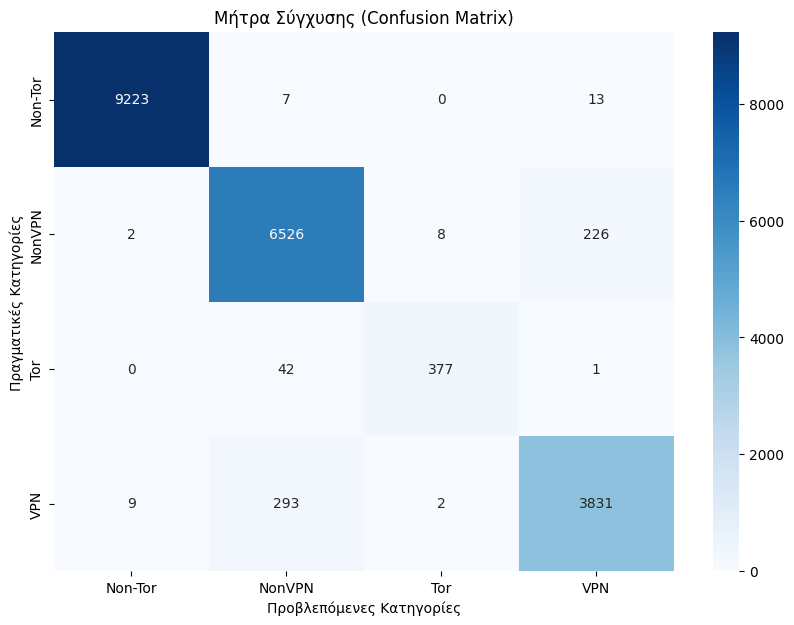

In [2]:
# Εισαγωγή απαραίτητων βιβλιοθηκών
import pandas as pd  # Διαχείριση και ανάλυση δεδομένων
import numpy as np   # Υποστήριξη αριθμητικών υπολογισμών
from sklearn.model_selection import train_test_split  # Διαχωρισμός δεδομένων σε εκπαίδευση και δοκιμή
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Κωδικοποίηση κατηγορικών μεταβλητών και κανονικοποίηση
from sklearn.ensemble import RandomForestClassifier  # Αλγόριθμος Random Forest για ταξινόμηση
from sklearn.metrics import classification_report, confusion_matrix  # Μετρικές αξιολόγησης του μοντέλου
import matplotlib.pyplot as plt  # Οπτικοποίηση δεδομένων
import seaborn as sns  # Βελτιωμένες γραφικές παραστάσεις

# Φόρτωση δεδομένων από το αρχείο CSV
data = pd.read_csv('/content/DarkNet.csv')  # Αντικαταστήστε με το μονοπάτι του αρχείου σας αν είναι διαφορετικό

# Προεπεξεργασία Δεδομένων
data['Flow_Bytes/s'] = pd.to_numeric(data['Flow_Bytes/s'], errors='coerce')  # Μετατροπή σε αριθμούς, αντικαθιστώντας μη αριθμητικές τιμές με NaN
data_cleaned = data.replace([np.inf, -np.inf], np.nan).dropna()  # Αφαίρεση απειριστικών και μη αριθμητικών τιμών

# Κωδικοποίηση της ετικέτας (Label-1)
label_encoder = LabelEncoder()  # Αρχικοποίηση του LabelEncoder
data_cleaned['Label-1'] = label_encoder.fit_transform(data_cleaned['Label-1'])  # Κωδικοποίηση κατηγορικών τιμών σε αριθμούς

# Επιλογή χαρακτηριστικών (X) και στόχου (y)
X = data_cleaned.drop(columns=['Src_IP', 'Dst_IP', 'Label-1', 'Label-2'])  # Αφαίρεση μη απαραίτητων στηλών
y = data_cleaned['Label-1']  # Ορισμός της ετικέτας ως στόχος

# Κανονικοποίηση χαρακτηριστικών
scaler = StandardScaler()  # Αρχικοποίηση κανονικοποιητή
X_scaled = scaler.fit_transform(X)  # Κανονικοποίηση των χαρακτηριστικών για βελτίωση της απόδοσης του αλγορίθμου

# Διαχωρισμός των δεδομένων σε σύνολα εκπαίδευσης και δοκιμής
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 70% εκπαίδευση, 30% δοκιμή

# Εκπαίδευση του μοντέλου Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Ορισμός του Random Forest με 100 δέντρα
rf_model.fit(X_train, y_train)  # Εκπαίδευση του μοντέλου με το εκπαιδευτικό σύνολο δεδομένων

# Προβλέψεις στο σύνολο δοκιμών
y_pred = rf_model.predict(X_test)  # Πρόβλεψη των αποτελεσμάτων στο σύνολο δοκιμής

# Αξιολόγηση του μοντέλου με μετρικές απόδοσης
conf_matrix = confusion_matrix(y_test, y_pred)  # Δημιουργία μήτρας σύγχυσης για αξιολόγηση της ακρίβειας ταξινόμησης
class_report = classification_report(y_test, y_pred)  # Αναφορά ταξινόμησης με ακρίβεια, ανάκληση και F1-score

# Εκτύπωση των αποτελεσμάτων
print("Αναφορά Ταξινόμησης (Classification Report):\n", class_report)

# Οπτικοποίηση της μήτρας σύγχυσης
plt.figure(figsize=(10, 7))  # Ρύθμιση μεγέθους γραφήματος
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)  # Θερμικός χάρτης της μήτρας σύγχυσης
plt.xlabel('Προβλεπόμενες Κατηγορίες')  # Ετικέτα άξονα x
plt.ylabel('Πραγματικές Κατηγορίες')  # Ετικέτα άξονα y
plt.title('Μήτρα Σύγχυσης (Confusion Matrix)')  # Τίτλος γραφήματος
plt.show()  # Εμφάνιση γραφήματος
